#Universidade de Fortaleza
#Mestrado em Ciência de Dados e Inteligência Artificial
#Aluno: Marcus Vinicius Barbosa Nunes de Miranda
#Disciplina: Introdução a Ciência de Dados
#Professor: Erneson Oliveira
#Objetivo: Esse trabalho visa responder se é possível comparar ideologias políticas a partir de tweets.

In [6]:
#Bibliotecas utilizadas

import matplotlib.pyplot as plt
import nltk
stopwordnltk = nltk.corpus.stopwords.words('portuguese')

In [ ]:
#Datasource com as entradas dos Dados
import pandas as pd
arquivobolsonaro = pd.read_json('jairbolsonaro.json')
arquivoLula = pd.read_json('LulaOficial.json')

In [17]:

lista_jair = arquivobolsonaro['full_text'].str.split()
print(lista_jair)
print(type(lista_jair))   

# Lista_lula = arquivoLula['full_text'].str.split()
# print(Lista_lula)
# print(type(Lista_lula))   

NameError: name 'arquivobolsonaro' is not defined

In [ ]:
# Analisando-se a coluna de datas created_at, utilizou-se uma rotina para se ler somente o ano. Ma optou-se por uma alternativa mais simples
# mostrada logo a seguir.

from pandas import Series
from datetime import datetime 
data_full=pd.read_json('jairbolsonaro.json')


#print(data)
#palavras_jair = data_full['full_text'].str.split()
#print(palavras_jair)

             

In [ ]:
# Criação da coluna ano e a quantidade de twitters em cada ano.

dsj['created_at']=dsj['created_at'].map(lambda x: x.strftime('%Y-%m'))

#  Agrupamento das colunas criadas
grouped_dsj = dsj.groupby('created_at').count()

# Imprimir na tela
grouped_dsj


In [ ]:
grouped_dsj[0]

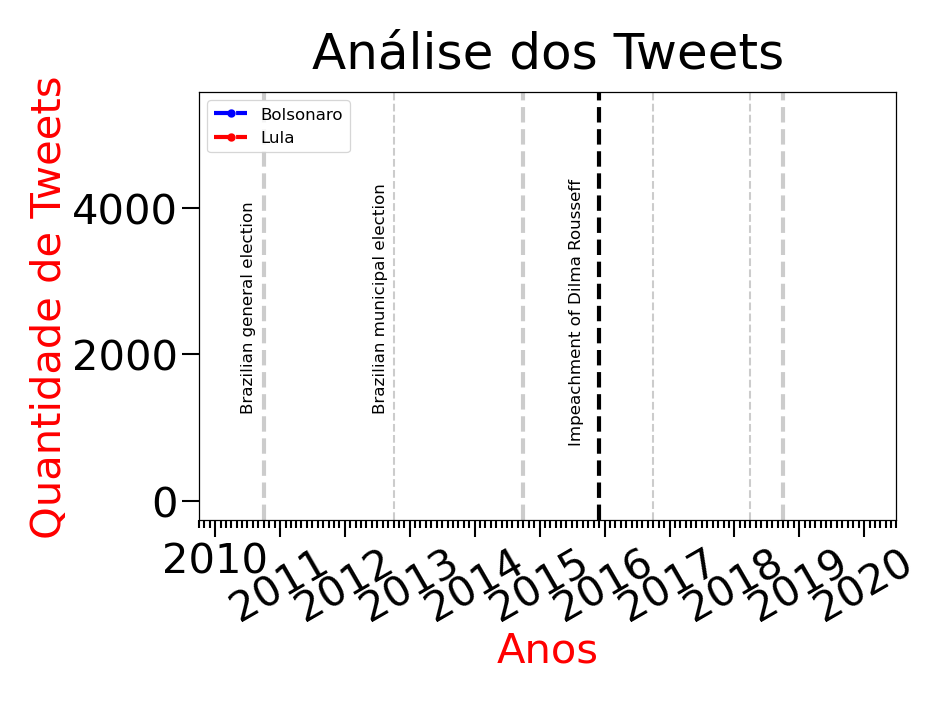

In [13]:
# Geração do gráfico de linhas, utilizando-se a biblioteca matplotlib e comparando as quantidades de twitters de
# Bolsonaro e de Lula ao longo de uma sérial temporal.


import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator,YearLocator, DateFormatter
from matplotlib import rc
import datetime as dt
usuario='jairbolsonaro'

x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 
y = [47, 1, 12, 193, 269, 435, 868, 1014, 1616, 2305,34]
x1 = [2014, 2015, 2016, 2017, 2018, 2019, 2020] 
y1 = [1515, 66, 2074, 5311, 4710, 1265, 20]
plt.rc('patch',linewidth=0.3)
plt.rc('axes',linewidth=0.3,labelpad=0.5)
plt.rc('xtick.minor',size=2,width=0.5)
plt.rc('xtick.major',size=4,width=0.5,pad=1)
plt.rc('ytick.minor',size=2,width=0.5)
plt.rc('ytick.major',size=4,width=0.5,pad=1)
figx=3
figy=(7/10)*figx

fig,ax=plt.subplots(figsize=(figx,figy),dpi=300)
ax.plot(x,y,marker='o',markersize=1,color='blue',linestyle='--', linewidth=1,label='Bolsonaro')
ax.plot(x1,y1,marker='o',markersize=1,color='red',linestyle='--', linewidth=1,label='Lula')
plt.legend(loc='upper left',fontsize=4)


# Screen name
#annotate='@'+usuario
#ax.annotate(annotate,xy=(0.05, 0.95),xycoords='axes fraction',ha='left',va='top',fontsize=8)
# Screen name

# Labels
#plt.xlabel('Time', fontsize=8)
#plt.ylabel('Frequency', fontsize=8)
# Labels

# formatação do eixo x
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

ax.fmt_xdata = DateFormatter('%Y-%m') # '%Y-%m-%d %H:%M:%S'
fig.autofmt_xdate()

for label in ax.get_xticklabels():
    label.set_horizontalalignment('center')

ax.set_xlim([dt.date(2009, 10, 1), dt.date(2020, 7, 1)]) # Fixed range


data=dt.datetime.strptime('2010-10','%Y-%m') # 2010 Brazilian general elections
ax.axvline(x=data,color='#000000',linestyle='--', linewidth=1, alpha=0.2)

data=dt.datetime.strptime('2012-10','%Y-%m') # 2012 Brazilian municipal elections
ax.axvline(x=data,color='#000000',linestyle='--', linewidth=0.5, alpha=0.2)

data=dt.datetime.strptime('2014-10','%Y-%m') # 2014 Brazilian general election
ax.axvline(x=data,color='#000000',linestyle='--', linewidth=1, alpha=0.2)

data=dt.datetime.strptime('2015-12','%Y-%m') # Impeachment of Dilma Rousseff
ax.axvline(x=data,color='#000000',linestyle='--', linewidth=1, alpha=1.0)

data=dt.datetime.strptime('2016-10','%Y-%m') # 2016 Brazilian municipal elections
ax.axvline(x=data,color='#000000',linestyle='--', linewidth=0.5, alpha=0.2)

data=dt.datetime.strptime('2018-04','%Y-%m') # 2018 Prisão do Lula
ax.axvline(x=data,color='#000000',linestyle='--', linewidth=0.5, alpha=0.2)

data=dt.datetime.strptime('2018-10','%Y-%m') # 2018 Brazilian general election
ax.axvline(x=data,color='#000000',linestyle='--', linewidth=1, alpha=0.2)


# Marcos temporais

# Rótulos dos marcos temporais
text=r'Impeachment of Dilma Rousseff'
ax.text(0.53,0.175,text,transform=ax.transAxes,fontsize=4,rotation=90,ha='left',va='bottom')

text=r'Brazilian municipal election'
ax.text(0.25,0.25,text,transform=ax.transAxes,fontsize=4,rotation=90,ha='left',va='bottom')

text=r'Brazilian general election'
ax.text(0.06,0.25,text,transform=ax.transAxes,fontsize=4,rotation=90,ha='left',va='bottom')


plt.title('Análise dos Tweets', color='black')
plt.xlabel('x', color = 'red')
plt.ylabel('y', color = 'red')
plt.xlabel('Anos', color = 'red')
plt.ylabel('Quantidade de Tweets', color = 'red')
#plt.plot(x, y)
#plt.plot(x1, y1)
plt.show()

In [ ]:
# Aqui foi outra tentativa de se criar um dataframe relacionando twitter e ano, mas optou-se pela solução anterior.

df2 = pd.DataFrame(data=[data,palavras_jair])
print(df2)     

In [ ]:
# Impressão da variável Palavras_Jair
print(palavras_jair)

In [ ]:
# Leitura do arquivo de texto stopwords e sua impressão. Esse arquivo de texto foi baixado na internet.

sw = pd.read_csv('stopwords.txt', header = None,names=['Palavras'])
sw

In [ ]:
# Criação de dicionário para contagem das palavras e registro das repetições, 
# onde a chave é a palavra e o valor é a quantidade de vezes que se repete.

dictj = dict()
for i in palavras_jair:
    for j in i:
        if j in dictj:
            dictj[j] = dictj[j] + 1
        else:
            dictj[j] = 1

In [ ]:
# impressão do dicionário dictj com chave e valor
dictj.items()

In [ ]:
# Exibição tabular do discionário com o cabeçalho: Palavras e QTD
pdj = pd.DataFrame(list(dictj.items()), columns=['Palavras', 'QTD'])

In [ ]:
# Impressão da tabela
pdj

In [ ]:
#Removendo Stop Words
npdj = pdj[~pdj.Palavras.isin(sw.Palavras.values)]

In [ ]:
# Ordenando em ordem decrescente as 30 palavras que mais se repetem. Destaca-se que não foi possível a retirada das stopwords,
# mas sendo possível visualizar as palavras mais frequentes, sem considerar as stopwords.
npdj.sort_values(['QTD'],ascending=False).head(30)

In [ ]:
# Criação da nuvem de palavras
sw = pd.read_csv('stopwords.txt', header = None, names=["Palavras"])
nuvem_palavras = ""
stopwords = set(sw.Palavras.values)
for words in npdj.Palavras:
    nuvem_palavras = nuvem_palavras + words + ""


In [14]:
# Instanciando a lista de Stop Words e acrescentando palavras novas:
stopwords = set(sw.Palavras.values)
stopwords.update(["feira", "http", "https", "co", "la", "lo", "ex", "ano", "AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO", "MA", "MT", "MS",
                   "MG", "PA", "PB", "PR","PE", "PI", "RJ", "RN", "RS", "RO", "RR", "SC", "SP", "SE", "TO"])

# Create the wordcloud object
wordcloud = WordCloud(stopwords=stopwords, width=480, height=480, margin=0).generate(nuvem_palavras)
 
# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
 
plt.show() 

NameError: name 'sw' is not defined